SVM

Task 1: Exploratory Data Analysis (EDA)

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn import svm
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


In [2]:
data=pd.read_csv("mushroom.csv")
data.head()

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


EDA : Exploratory Data Analysis

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

In [4]:
data.columns

Index(['Unnamed: 0', 'cap_shape', 'cap_surface', 'cap_color', 'bruises',
       'odor', 'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number',
       'ring_type', 'spore_print_color', 'population', 'habitat', 'class',
       'stalk_height', 'cap_diameter'],
      dtype='object')

In [5]:
data.describe()

,Unnamed: 0,stalk_height,cap_diameter
count,2000.000000,2000.000000,2000.000000
mean,624.974000,8.449118,12.314345
std,375.091938,3.697217,7.048845
min,0.000000,2.000000,1.000000
25%,290.000000,5.291009,5.723521
50%,607.000000,8.318596,12.124902
75%,957.250000,11.781272,18.698605
max,1279.000000,15.095066,25.000054


In [6]:
data.isnull().sum()

Unnamed: 0                  0
cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
class                       0
stalk_height                0
cap_diameter                0
dtype: int64

In [7]:
data.duplicated().sum()

1024

In [8]:
data.drop_duplicates(inplace=True)

In [9]:
data.corr()

,Unnamed: 0,stalk_height,cap_diameter
Unnamed: 0,1.000000,0.000815,0.042726
stalk_height,0.000815,1.000000,-0.034891
cap_diameter,0.042726,-0.034891,1.000000


In [10]:
data.columns

Index(['Unnamed: 0', 'cap_shape', 'cap_surface', 'cap_color', 'bruises',
       'odor', 'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number',
       'ring_type', 'spore_print_color', 'population', 'habitat', 'class',
       'stalk_height', 'cap_diameter'],
      dtype='object')

Data Visualization

array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'stalk_height'}>],
       [<Axes: title={'center': 'cap_diameter'}>, <Axes: >]], dtype=object)

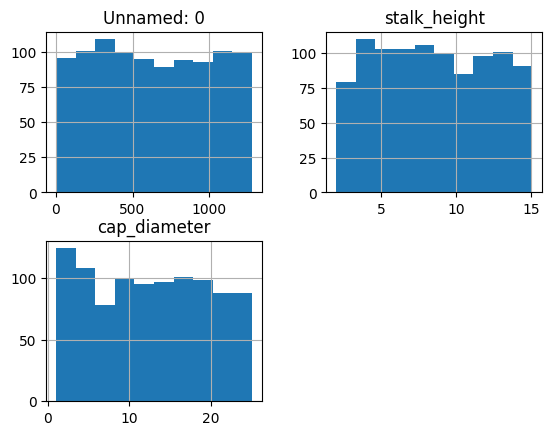

In [11]:
data.hist()

<Axes: >

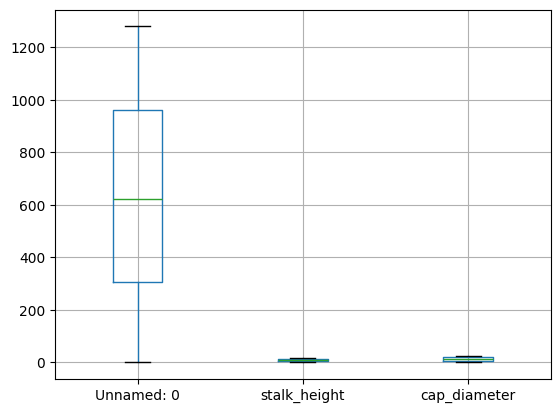

In [12]:
data.boxplot()

In [13]:
# Outlier removal 
# Detect outliers using IQR method
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# Define a function to identify outliers
def detect_outliers_iqr(data):
    outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR)))
    return outliers

# Apply the function to the dataframe
outliers = detect_outliers_iqr(data)

# Print outliers summary
print(outliers.sum())

# Remove outliers from the dataframe
data = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]
data

Unnamed: 0                  0
bruises                     0
cap_color                   0
cap_diameter                0
cap_shape                   0
cap_surface                 0
class                       0
gill_attachment             0
gill_color                  0
gill_size                   0
gill_spacing                0
habitat                     0
odor                        0
population                  0
ring_number                 0
ring_type                   0
spore_print_color           0
stalk_color_above_ring      0
stalk_color_below_ring      0
stalk_height                0
stalk_root                  0
stalk_shape                 0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
veil_color                  0
veil_type                   0
dtype: int64


,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1985,877,conical,grooves,brown,no,foul,notched,crowded,broad,chocolate,...,universal,brown,none,large,brown,numerous,paths,edible,13.020616,9.993008
1988,926,bell,grooves,pink,yes,anise,descending,distant,broad,brown,...,partial,brown,two,pendant,yellow,numerous,grasses,poisonous,3.751597,18.868135
1989,289,sunken,smooth,purple,yes,anise,descending,crowded,narrow,buff,...,universal,orange,two,none,orange,abundant,grasses,edible,13.134058,15.740028
1996,1160,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,...,partial,white,one,zone,yellow,numerous,waste,poisonous,6.500840,13.501957


<Axes: >

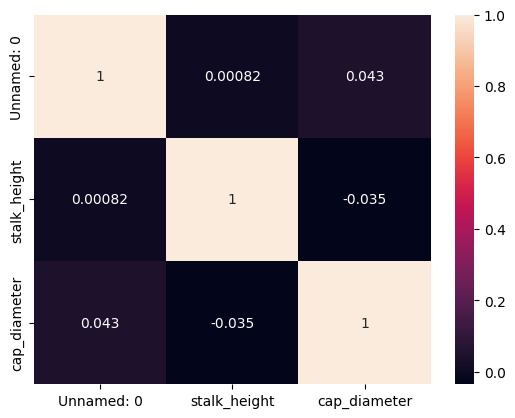

In [14]:
sns.heatmap(data.corr(),annot=True)

Data Encoding

In [15]:
label=LabelEncoder()
for column in data.select_dtypes(include=['object']).columns:
    data[column] = label.fit_transform(data[column])
data

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,4,2,7,0,1,1,2,0,7,...,0,0,2,6,3,1,5,1,14.276173,5.054983
1,1037,4,0,6,0,1,3,1,1,3,...,1,0,2,6,1,2,5,0,3.952715,19.068319
2,309,3,1,5,1,4,1,1,0,8,...,1,3,2,6,6,0,5,1,9.054265,7.205884
3,282,0,2,4,1,3,3,0,0,6,...,0,3,2,0,4,1,0,1,5.226499,20.932692
4,820,3,3,8,1,5,2,1,1,6,...,1,2,0,4,8,1,4,1,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1985,877,1,1,0,0,4,3,1,0,3,...,1,0,0,3,1,2,3,0,13.020616,9.993008
1988,926,0,1,4,1,1,1,2,0,1,...,0,0,2,5,8,2,0,1,3.751597,18.868135
1989,289,4,3,5,1,1,1,1,1,2,...,1,1,2,4,5,0,0,0,13.134058,15.740028
1996,1160,4,2,5,1,5,0,2,1,9,...,0,2,1,7,8,2,5,1,6.500840,13.501957


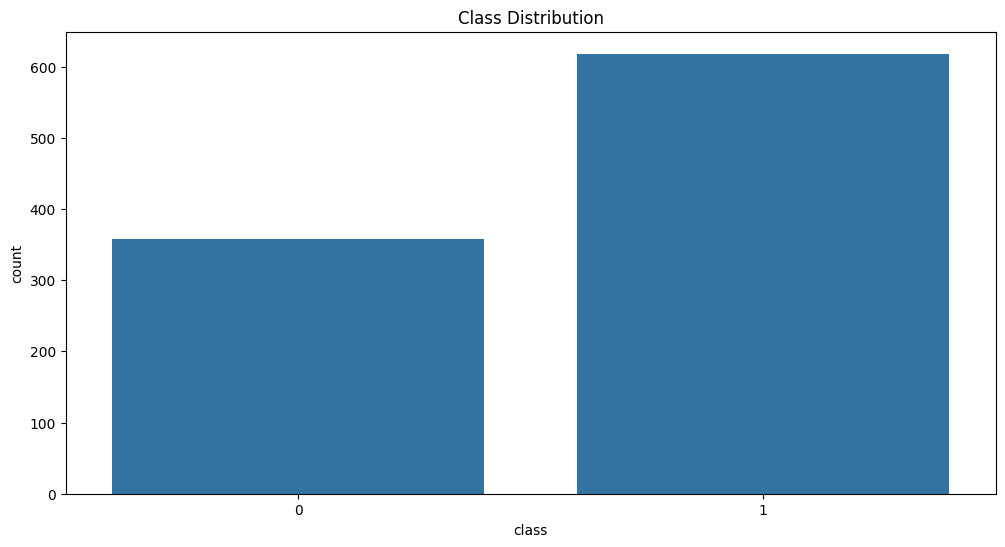

In [16]:
plt.figure(figsize=(12, 6))
sns.countplot(x='class', data=data)
plt.title('Class Distribution')
plt.show()

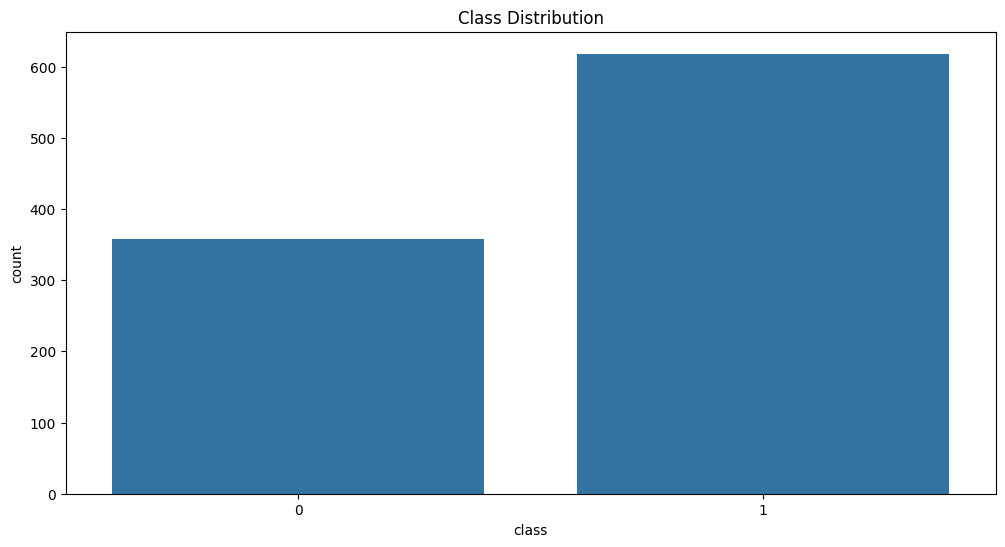

In [17]:
plt.figure(figsize=(12, 6))
sns.countplot(x='class', data=data)
plt.title('Class Distribution')
plt.show()

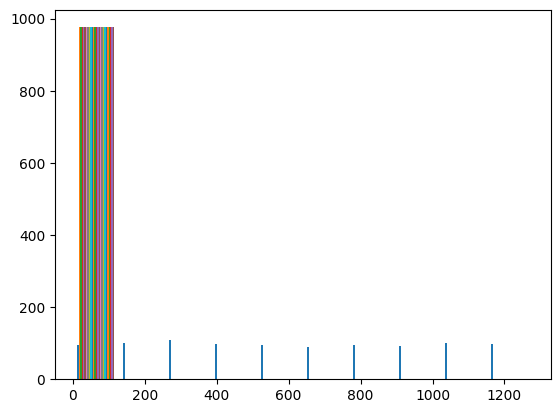

In [18]:
plt.hist(data)
plt.show()

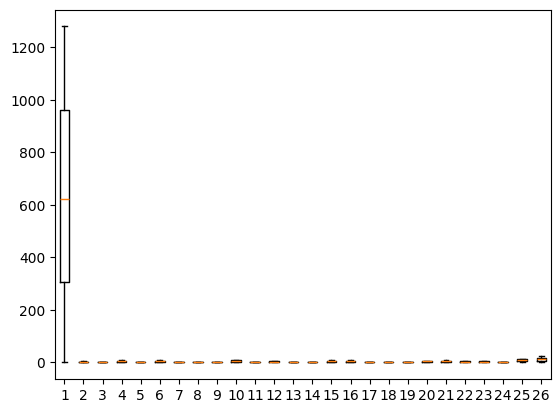

In [19]:
plt.boxplot(data)
plt.show()

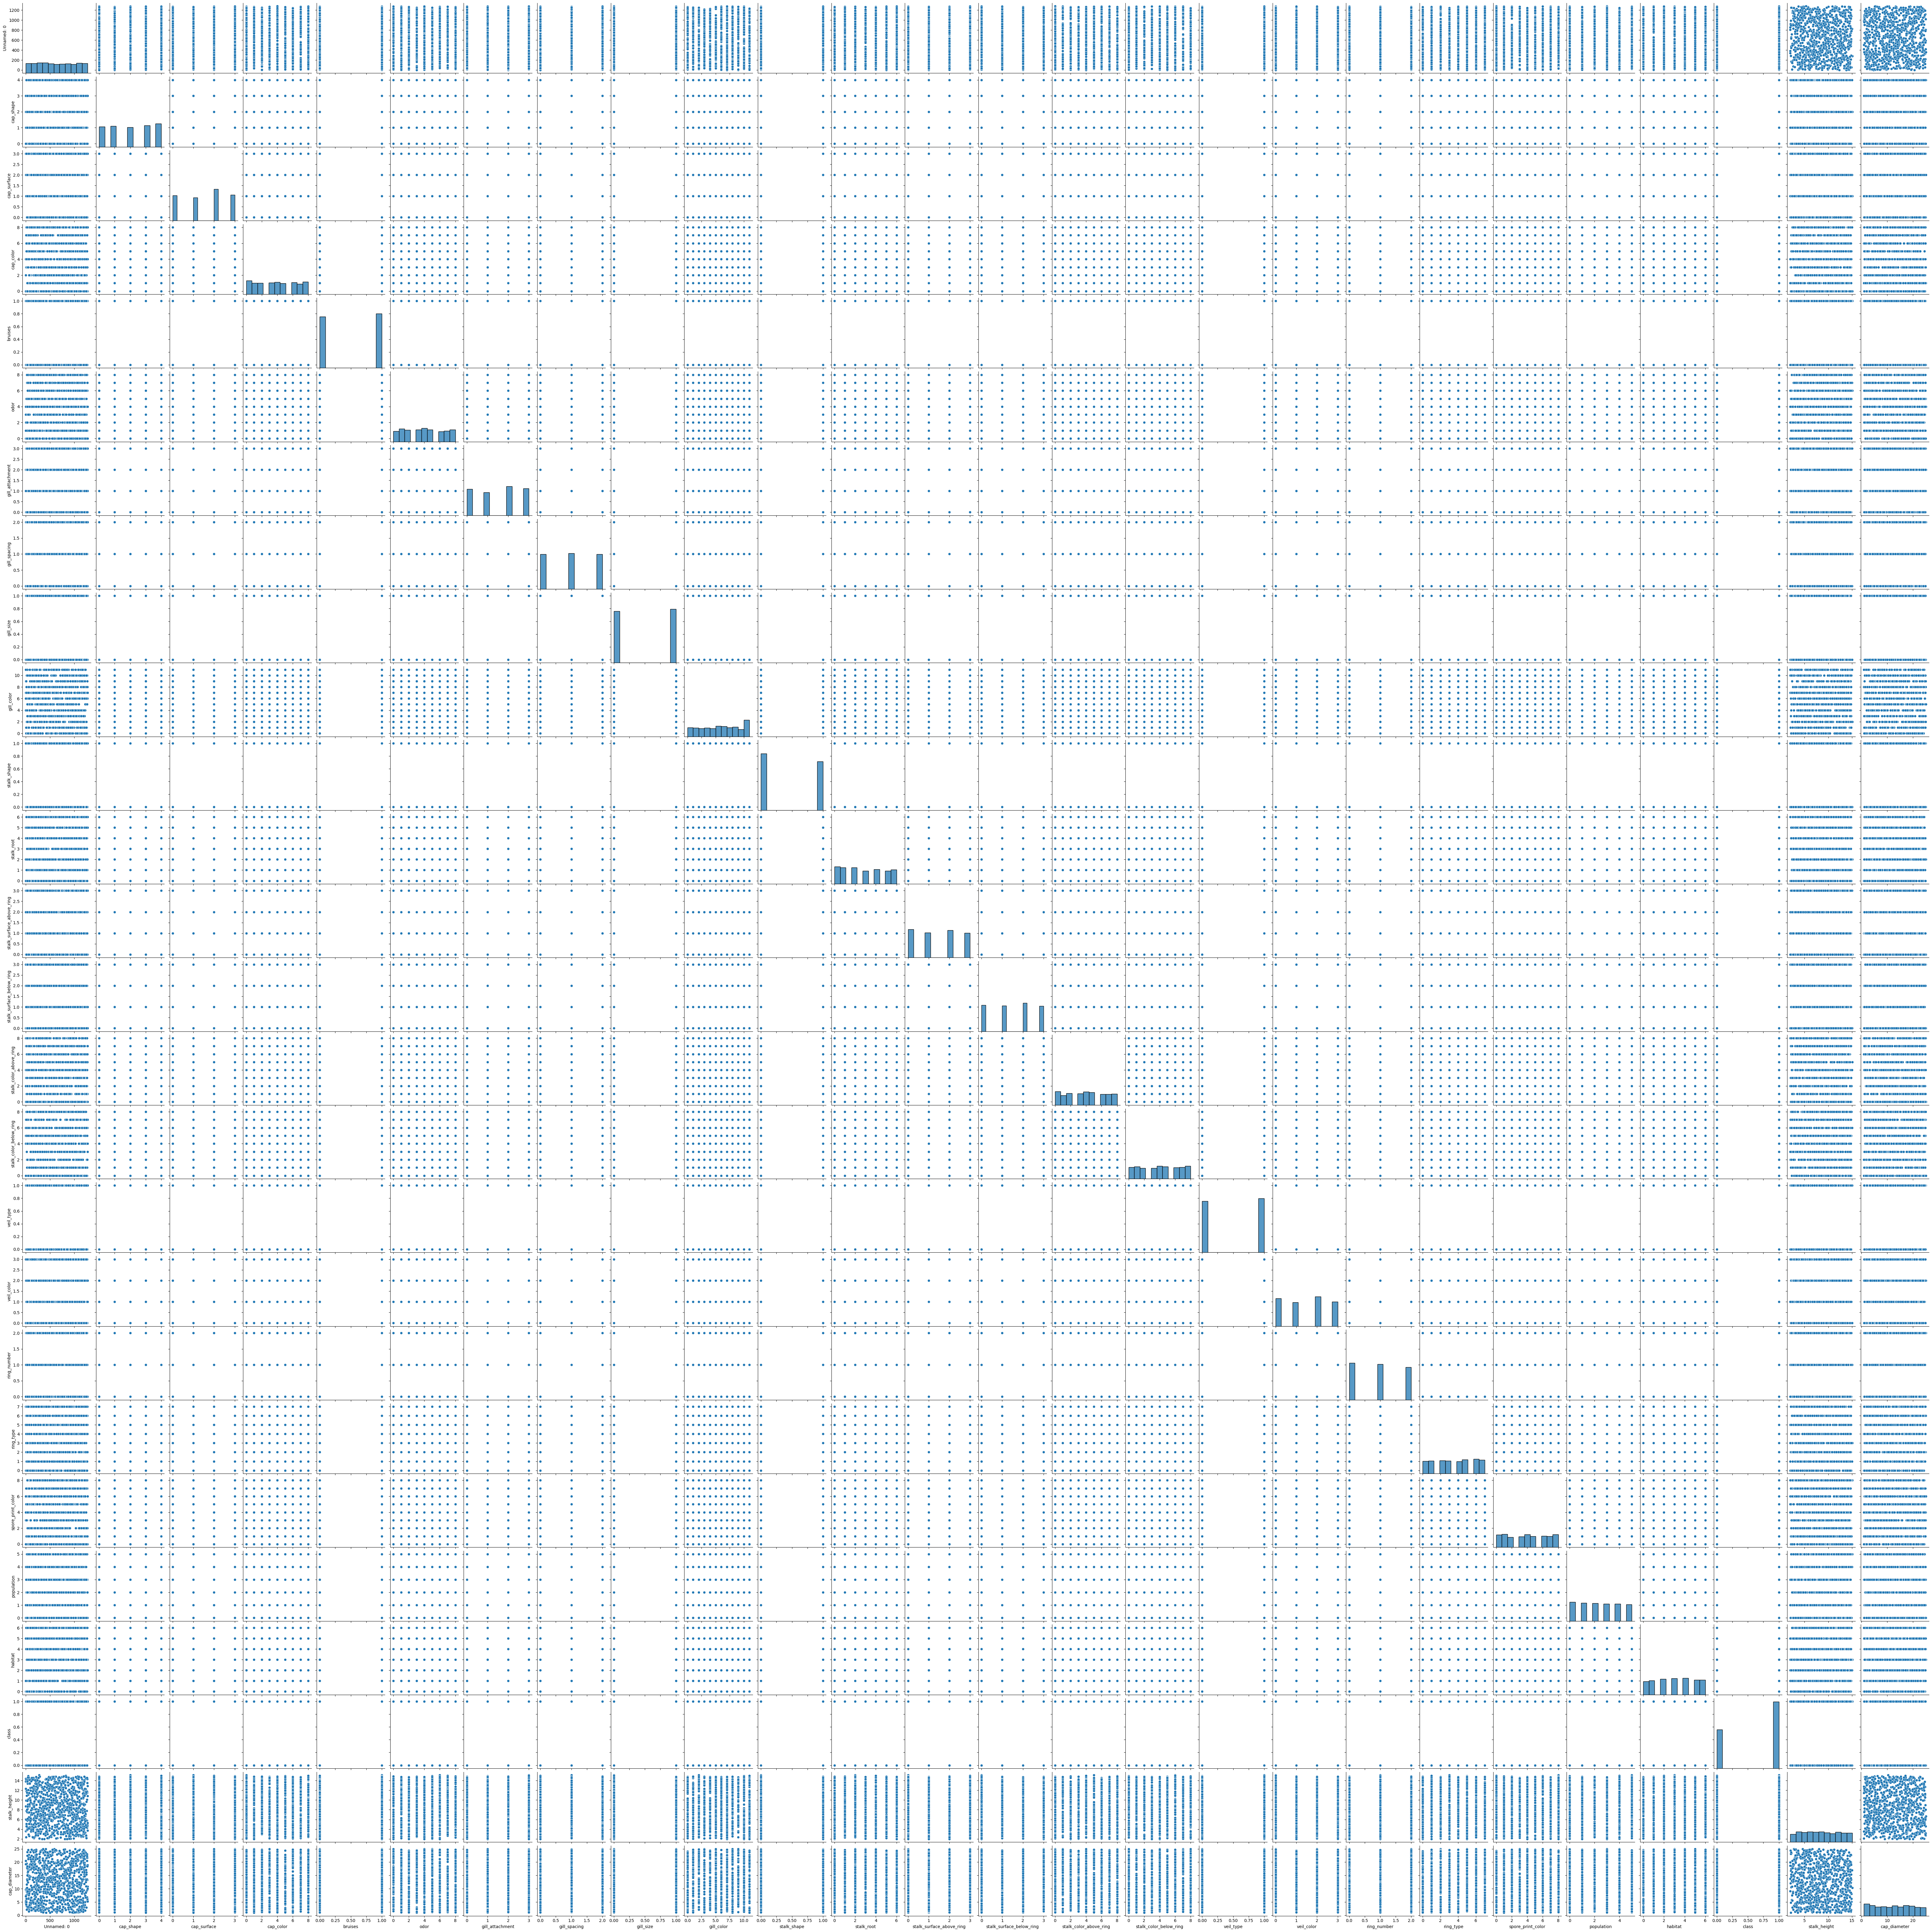

In [20]:
sns.pairplot(data)

In [21]:
data['stalk_height']=data['stalk_height'].astype(int)
data['cap_diameter']=data['cap_diameter'].astype(int)
data

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,4,2,7,0,1,1,2,0,7,...,0,0,2,6,3,1,5,1,14,5
1,1037,4,0,6,0,1,3,1,1,3,...,1,0,2,6,1,2,5,0,3,19
2,309,3,1,5,1,4,1,1,0,8,...,1,3,2,6,6,0,5,1,9,7
3,282,0,2,4,1,3,3,0,0,6,...,0,3,2,0,4,1,0,1,5,20
4,820,3,3,8,1,5,2,1,1,6,...,1,2,0,4,8,1,4,1,14,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1985,877,1,1,0,0,4,3,1,0,3,...,1,0,0,3,1,2,3,0,13,9
1988,926,0,1,4,1,1,1,2,0,1,...,0,0,2,5,8,2,0,1,3,18
1989,289,4,3,5,1,1,1,1,1,2,...,1,1,2,4,5,0,0,0,13,15
1996,1160,4,2,5,1,5,0,2,1,9,...,0,2,1,7,8,2,5,1,6,13


In [22]:
data.columns

Index(['Unnamed: 0', 'cap_shape', 'cap_surface', 'cap_color', 'bruises',
       'odor', 'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number',
       'ring_type', 'spore_print_color', 'population', 'habitat', 'class',
       'stalk_height', 'cap_diameter'],
      dtype='object')

Split data

In [23]:
#spliting the data
x=data.drop(['class'],axis=1)
y=data['class']
x,y

(      Unnamed: 0  cap_shape  cap_surface  cap_color  bruises  odor  \
 0           1167          4            2          7        0     1   
 1           1037          4            0          6        0     1   
 2            309          3            1          5        1     4   
 3            282          0            2          4        1     3   
 4            820          3            3          8        1     5   
 ...          ...        ...          ...        ...      ...   ...   
 1985         877          1            1          0        0     4   
 1988         926          0            1          4        1     1   
 1989         289          4            3          5        1     1   
 1996        1160          4            2          5        1     5   
 1999        1073          2            2          8        1     7   
 
       gill_attachment  gill_spacing  gill_size  gill_color  ...  \
 0                   1             2          0           7  ...   
 1        

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=42)

In [25]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train,x_test

(array([[-0.17799506, -0.0286743 , -1.4104593 , ..., -0.52912275,
         -0.55356896,  0.11781037],
        [-1.41798608,  1.36919761,  0.3960403 , ..., -0.01451459,
          0.8042417 ,  1.2505326 ],
        [ 0.1755229 , -0.72761025, -1.4104593 , ...,  0.50009358,
          0.53267956, -1.01491186],
        ...,
        [-0.95734146,  0.67026166, -0.5072095 , ..., -0.52912275,
         -1.36825535,  0.25940065],
        [-1.55992889, -0.0286743 ,  1.29929009, ...,  0.50009358,
         -0.28200683,  1.2505326 ],
        [ 1.37534143,  1.36919761,  1.29929009, ...,  1.5293099 ,
          0.26111743, -1.58127297]]),
 array([[ 1.43961742, -1.42654621,  1.29929009, ..., -1.04373092,
         -1.09669322, -1.43968269],
        [-0.05212124,  0.67026166, -1.4104593 , ...,  1.5293099 ,
         -0.55356896, -0.02377991],
        [-0.45652436, -0.0286743 ,  1.29929009, ...,  0.50009358,
         -1.63981748,  1.53371316],
        ...,
        [-0.36011037,  1.36919761, -1.4104593 , ..., -

In [26]:
svm_model=svm.SVC(kernel='linear')

In [27]:
svm_model.fit(x_train,y_train)

SVC(kernel='linear')

In [28]:
y_pred=svm_model.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [29]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.63      0.78       196

    accuracy                           0.63       196
   macro avg       0.50      0.32      0.39       196
weighted avg       1.00      0.63      0.78       196



In [30]:
print(accuracy_score(y_pred,y_test))

0.6326530612244898


In [31]:
cm=confusion_matrix(y_pred,y_test)
cm

array([[  0,   0],
       [ 72, 124]], dtype=int64)

Task 5: Visualization of SVM Results

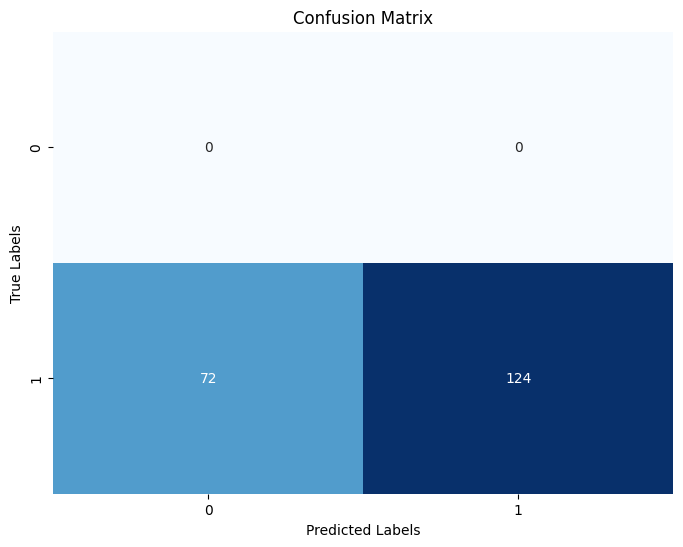

In [32]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

Hyper Parameter tunning

In [33]:
# SVM hyper parameter
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}
# Instantiate the GridSearchCV object
clf= GridSearchCV(svm_model, param_grid=param_grid, cv=5, scoring='accuracy')
# Fit the model to the training data
clf.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVC(kernel='linear'),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='accuracy')

In [34]:
y_pred=clf.predict(x_test)

In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        72
           1       0.63      1.00      0.78       124

    accuracy                           0.63       196
   macro avg       0.32      0.50      0.39       196
weighted avg       0.40      0.63      0.49       196



In [36]:
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Accuracy: 0.6326530612244898


In [37]:
# Experiment with different SVM hyperparameters
# Example: Experimenting with different kernel types
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Function to train and evaluate an SVM model
def train_and_evaluate_svm(kernel_type):
    model = SVC(kernel=kernel_type)
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    
    print(f"Kernel: {kernel_type.capitalize()}")
    print(confusion_matrix(y_test, predictions))
    print(classification_report(y_test, predictions))
    print(f"Accuracy: {accuracy_score(y_test, predictions):.4f}\n")
    
    return accuracy_score(y_test, predictions)

# Linear Kernel
accuracy_linear = train_and_evaluate_svm('linear')

# Polynomial Kernel
accuracy_poly = train_and_evaluate_svm('poly')

# RBF Kernel
accuracy_rbf = train_and_evaluate_svm('rbf')

# Sigmoid Kernel
accuracy_sigmoid = train_and_evaluate_svm('sigmoid')


Kernel: Linear
[[  0  72]
 [  0 124]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        72
           1       0.63      1.00      0.78       124

    accuracy                           0.63       196
   macro avg       0.32      0.50      0.39       196
weighted avg       0.40      0.63      0.49       196

Accuracy: 0.6327

Kernel: Poly
[[  5  67]
 [  4 120]]
              precision    recall  f1-score   support

           0       0.56      0.07      0.12        72
           1       0.64      0.97      0.77       124

    accuracy                           0.64       196
   macro avg       0.60      0.52      0.45       196
weighted avg       0.61      0.64      0.53       196

Accuracy: 0.6378

Kernel: Rbf
[[  1  71]
 [  2 122]]
              precision    recall  f1-score   support

           0       0.33      0.01      0.03        72
           1       0.63      0.98      0.77       124

    accuracy                         

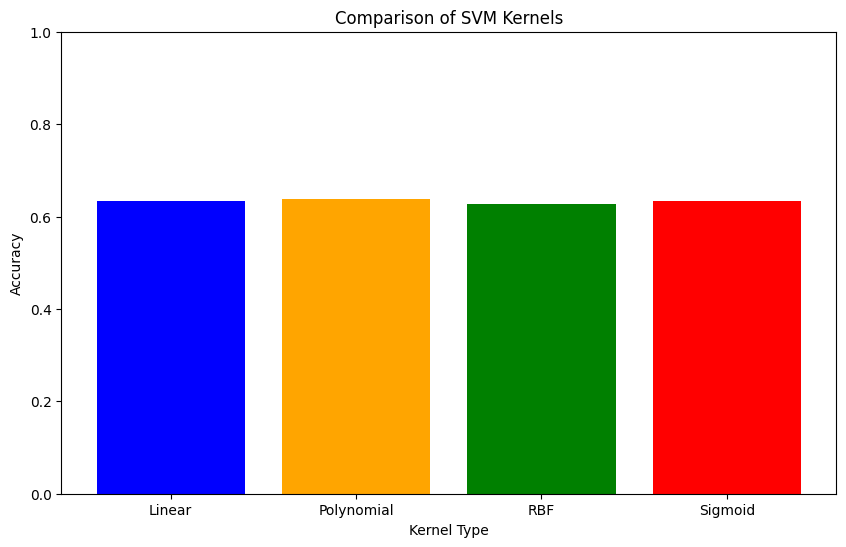

In [38]:
#Compare SVM performance with various kernels (e.g., linear, polynomial, radial basis function)
import matplotlib.pyplot as plt

# Compare the accuracy of different kernels
kernels = ['Linear', 'Polynomial', 'RBF', 'Sigmoid']
accuracies = [accuracy_linear, accuracy_poly, accuracy_rbf, accuracy_sigmoid]

plt.figure(figsize=(10, 6))
plt.bar(kernels, accuracies, color=['blue', 'orange', 'green', 'red'])
plt.xlabel('Kernel Type')
plt.ylabel('Accuracy')
plt.title('Comparison of SVM Kernels')
plt.ylim(0, 1)
plt.show()





### Analyze SVM strengths and weaknesses for the Mushroom dataset based on EDA and visualization results.

*Strengths*:
- *High-Dimensional Handling*: SVMs handle the large number of features in the mushroom dataset well, which is a common strength of SVMs.
- *Customizable Kernels*: The ability to use different kernels (Linear, Polynomial, RBF, Sigmoid) allows flexibility in capturing various data patterns.

*Weaknesses*:
- *Class Imbalance Sensitivity*: The EDA shows that the SVM models, especially with linear and RBF kernels, perform poorly on the minority class. The recall for class 0 is 0.00, indicating the model fails to predict the minority class correctly.
- *Overfitting Risk*: SVMs with complex kernels (like Polynomial) might overfit, especially when the dataset is imbalanced or when there's a significant difference between classes.
- *Performance Limitations*: Despite using SMOTE to address class imbalance, the accuracy remains moderate, suggesting SVMs might not be the best choice for this dataset.

### Discuss practical implications of SVM in real-world classification tasks.

Support Vector Machines (SVM) are powerful tools for classification tasks in various real-world scenarios. Here are some practical implications:

1. *Text Classification*: SVMs excel in tasks like spam detection and sentiment analysis due to their effectiveness in high-dimensional spaces where text data is often represented as feature vectors.

2. *Image Classification*: They are used in facial recognition and object detection, benefiting from SVM's ability to handle complex, high-dimensional data effectively.

3. *Medical Diagnosis*: SVMs can assist in classifying medical conditions from patient data, helping in the early detection of diseases like cancer by distinguishing between different tissue types or genetic markers.

4. *Financial Forecasting*: In stock market analysis, SVMs can be employed to predict trends and classify financial instruments based on historical data.

5. *Bioinformatics*: SVMs are used for gene expression analysis and protein classification, providing insights into biological functions and disease mechanisms.

6. *Anomaly Detection*: They help in identifying rare events or outliers in data, such as fraud detection in banking or network intrusion in cybersecurity.

SVM's ability to handle both linear and non-linear classification through kernel tricks makes them versatile across these diverse fields.